<h2 align=center>Hr_Analytics_Case_Study </h2>

## Problem statements

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

+ The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
+ A sizeable department has to be maintained, for the purposes of recruiting new talent
+ More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

## Goal of the case study

We are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## Loading data and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [2]:
#Loading dataset
employee_survey = pd.read_csv("employee_survey_data.csv")
general_data = pd.read_csv("general_data.csv")
manager_survey = pd.read_csv("manager_survey_data.csv")

In [3]:
employee_survey[:2]

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [4]:
manager_survey[:2]

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [5]:
general_data[:2]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


In [6]:
#to check shape of data for the purpose of joining different data frame which are related to the main data
print('employee_survey_data shape is:',employee_survey.shape)
print('general_data  shape is :',general_data.shape)
print('manager_survey_data shape is : ',manager_survey.shape)

employee_survey_data shape is: (4410, 4)
general_data  shape is : (4410, 24)
manager_survey_data shape is :  (4410, 3)


## joining the dataset

In [7]:
df1 = pd.merge(general_data,employee_survey,left_on='EmployeeID',right_on='EmployeeID',how = 'left')

In [8]:
df1[:2]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0


In [9]:
dataset = pd.merge(df1,manager_survey,left_on='EmployeeID',right_on='EmployeeID',how = 'left')

In [10]:
dataset[:2]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4


## Exploratory Data Analysis

### Number of Unique value in each features

In [11]:
#for this loop we should varified what types of data and their level
for col_name in dataset:
    print(col_name,dataset[col_name].nunique())

Age 43
Attrition 2
BusinessTravel 3
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeID 4410
Gender 2
JobLevel 5
JobRole 9
MaritalStatus 3
MonthlyIncome 1349
NumCompaniesWorked 10
Over18 1
PercentSalaryHike 15
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
YearsAtCompany 37
YearsSinceLastPromotion 16
YearsWithCurrManager 18
EnvironmentSatisfaction 4
JobSatisfaction 4
WorkLifeBalance 4
JobInvolvement 4
PerformanceRating 2


In [12]:
[print(w,dataset[w].nunique()) for w in dataset]

Age 43
Attrition 2
BusinessTravel 3
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeID 4410
Gender 2
JobLevel 5
JobRole 9
MaritalStatus 3
MonthlyIncome 1349
NumCompaniesWorked 10
Over18 1
PercentSalaryHike 15
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
YearsAtCompany 37
YearsSinceLastPromotion 16
YearsWithCurrManager 18
EnvironmentSatisfaction 4
JobSatisfaction 4
WorkLifeBalance 4
JobInvolvement 4
PerformanceRating 2


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Remove features
Remove features that should have only one label which s not variance or singnifies to predict the relaton of other

In [13]:
dataset.drop(['EmployeeCount','Over18','StandardHours','EmployeeID'],axis=1,inplace=True)

In [14]:
for col_name in dataset:
    print(col_name,dataset[col_name].nunique())

Age 43
Attrition 2
BusinessTravel 3
Department 3
DistanceFromHome 29
Education 5
EducationField 6
Gender 2
JobLevel 5
JobRole 9
MaritalStatus 3
MonthlyIncome 1349
NumCompaniesWorked 10
PercentSalaryHike 15
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
YearsAtCompany 37
YearsSinceLastPromotion 16
YearsWithCurrManager 18
EnvironmentSatisfaction 4
JobSatisfaction 4
WorkLifeBalance 4
JobInvolvement 4
PerformanceRating 2


## Categorical columns

+ Attrition
+ BusinessTravel
+ Department
+ Eduation
+ EducationField
+ Gender
+ JobLevel
+ JobRole
+ MaritalStatus
+ StockOptionalLevel
+ EnvironmentSatisfaction
+ JobClassificattion
+ WorkLifeBalance
+ JobInvolvement
+ PerformanceRating

## Numerical Variables

+ DistanceFromHome
+ Monthly Income
+ NumCompaniesWorked
+ PercentSalaryHike
+ TotalworkingYears
+ TrainingTimeLastYears
+ YearsAtCompany
+ YearsSinceLastYearPromotion
+ YearsWithCurrManager

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 25 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4401 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-null int64
YearsSinceLastPromotion    4410 non-

## Working With Null Values

In [16]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

#### variables which have null values

In [17]:
#Check the value count level-wise
for i in list(dataset[['NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']]):
    print(dataset[i].value_counts())
    print()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

4.0    1367
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64

3.0    2660
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64



In [18]:
# filling na values 
dataset['NumCompaniesWorked'].fillna(0,inplace=True)
dataset['EnvironmentSatisfaction'].fillna(3,inplace=True)
dataset['JobSatisfaction'].fillna(4,inplace=True)
dataset['WorkLifeBalance'].fillna(3,inplace=True)
dataset['TotalWorkingYears'].fillna(10,inplace=True)

In [19]:
dataset.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

#### General concept if you want to more explore and fill the null values on the basis of more exploratory

In [20]:
# filing na vlaues with eda
dataset.groupby(['Attrition','Gender'])['EnvironmentSatisfaction'].value_counts()

Attrition  Gender  EnvironmentSatisfaction
No         Female  3.0                        481
                   4.0                        477
                   2.0                        317
                   1.0                        219
           Male    3.0                        703
                   4.0                        678
                   1.0                        413
                   2.0                        411
Yes        Female  1.0                         78
                   4.0                         66
                   3.0                         64
                   2.0                         62
           Male    1.0                        135
                   3.0                        127
                   4.0                        113
                   2.0                         66
Name: EnvironmentSatisfaction, dtype: int64

In [21]:
## analyse the distribution of various attribute
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4410.0,2.683220,2.499737,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,4410.0,0.793878,0.851883,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,4410.0,11.277324,7.774490,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0


## How dependent variable distribute with independent variable using Mean Central Tendancy

In [22]:
# Let us look the dependent variable Attrition to understand how the data distributed amongst the various values
dataset.groupby(['Attrition']).mean()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Attrition,,,,,,,,,,,,,,,,,,
No,37.561233,9.227088,2.919708,2.068938,65672.595296,2.637740,15.157340,0.796431,11.857259,2.827251,7.369019,2.234388,4.367397,2.773723,2.784266,2.782914,2.734793,3.150041
Yes,33.607595,9.012658,2.877637,2.037975,61682.616034,2.919831,15.481013,0.780591,8.260197,2.654008,5.130802,1.945148,2.852321,2.472574,2.472574,2.662447,2.704641,3.172996


## Conversion of data types

In [23]:
dataset[['Education','JobLevel','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']] = dataset[['Education','JobLevel','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']].astype('category')

## Data visualization

## Assigning categorigal and numerical as a new variable

In [24]:
cat_variable = dataset[['Attrition','BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']]
num_variable = dataset[['Attrition','Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']]

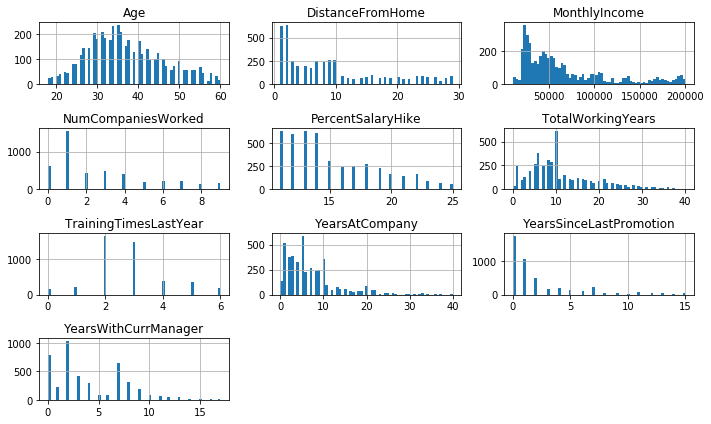

In [25]:
##Checking data normalization in categorical variable
num_variable.hist(bins = 65,figsize=(10,6))
plt.tight_layout()
plt.show()

above plot shwos the distribution of data either data are normally ditributed or right,left skewed

In [26]:
cat_variable[:2]

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,No,Travel_Rarely,Sales,2,Life Sciences,Female,1,Healthcare Representative,Married,0,3.0,4.0,2.0,3,3
1,Yes,Travel_Frequently,Research & Development,1,Life Sciences,Female,1,Research Scientist,Single,1,3.0,2.0,4.0,2,4


Attrition


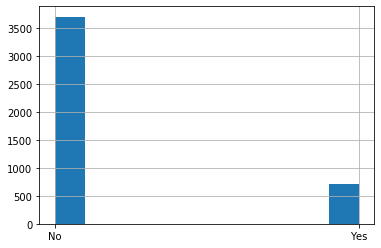

BusinessTravel


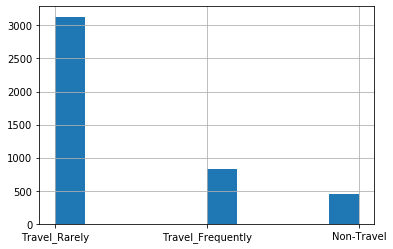

Department


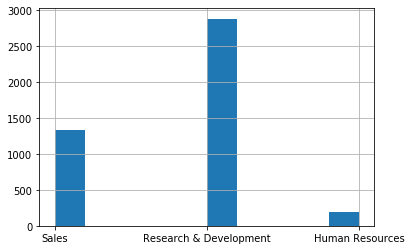

Education


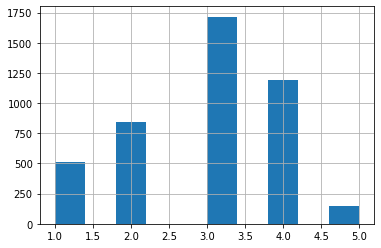

EducationField


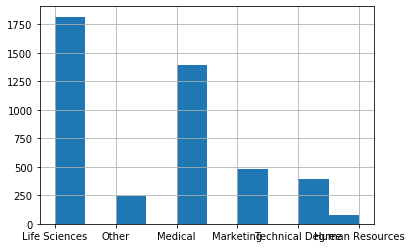

Gender


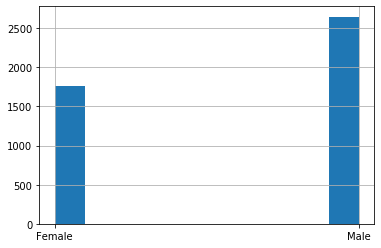

JobLevel


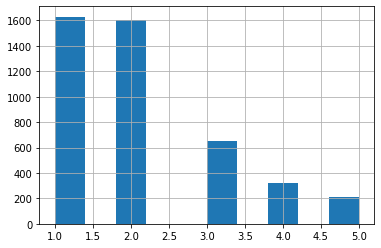

JobRole


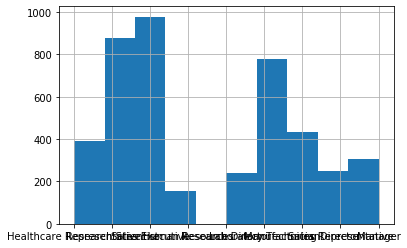

MaritalStatus


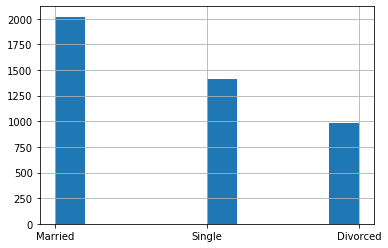

StockOptionLevel


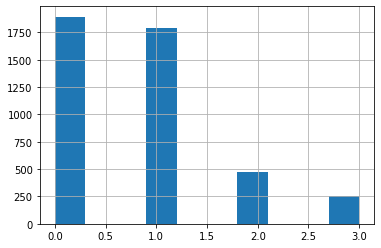

EnvironmentSatisfaction


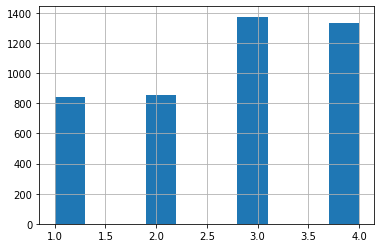

JobSatisfaction


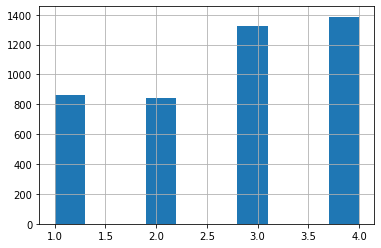

WorkLifeBalance


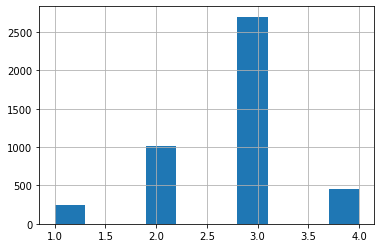

JobInvolvement


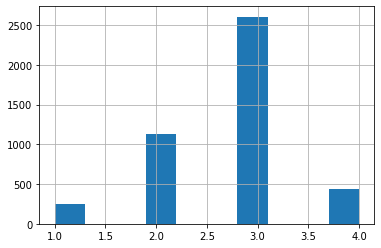

PerformanceRating


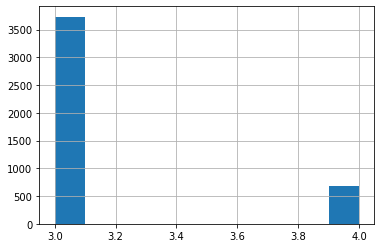

In [27]:
#visualization data strucuture in the histogram formate
for column in cat_variable:
    print(column)
    cat_variable[column].hist()
    plt.show()

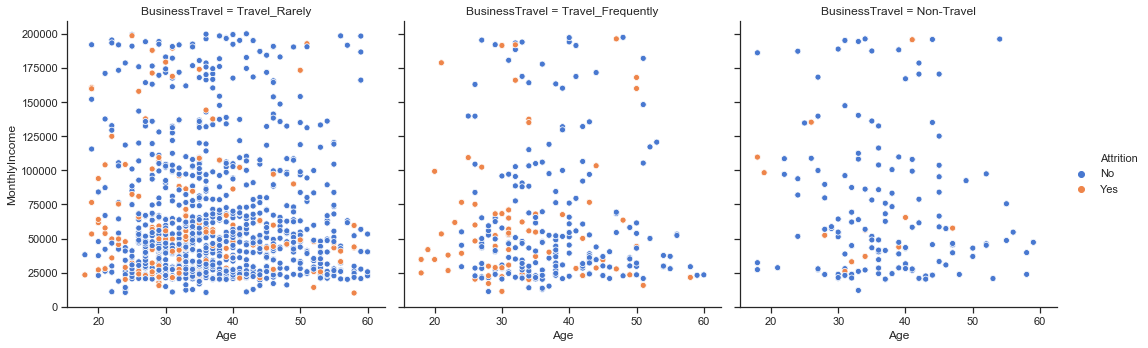

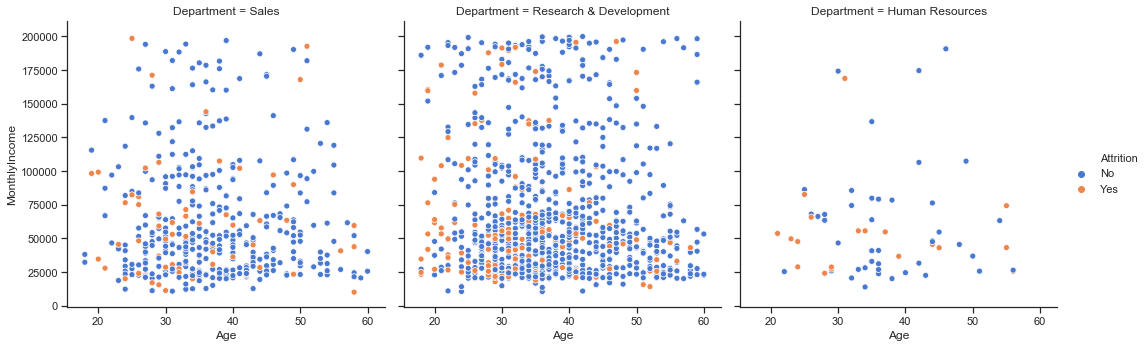

In [28]:
#shows the relation plot 
sns.set(style = 'ticks',palette = 'muted')
sns.relplot(x='Age' , y = 'MonthlyIncome',col = 'BusinessTravel',hue = 'Attrition',data = dataset)
sns.relplot(x='Age' , y = 'MonthlyIncome',col = 'Department',hue = 'Attrition',data = dataset)

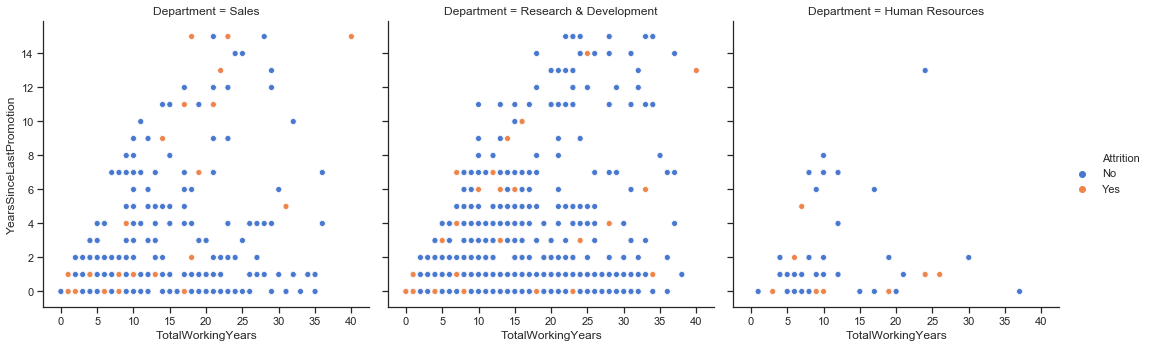

In [29]:
sns.relplot(x='TotalWorkingYears' , y = 'YearsSinceLastPromotion',col = 'Department',hue = 'Attrition',data = dataset)

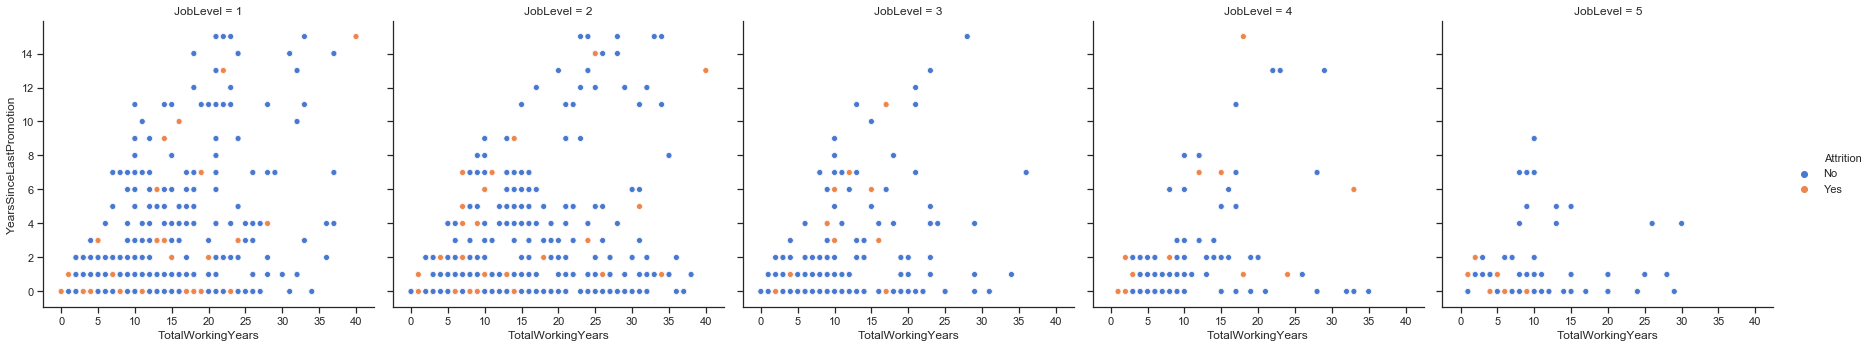

In [30]:
sns.relplot(x='TotalWorkingYears' , y = 'YearsSinceLastPromotion',col = 'JobLevel',hue = 'Attrition',data = dataset)

Attrition


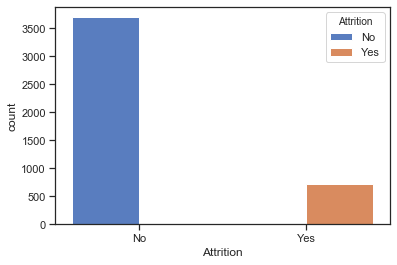

BusinessTravel


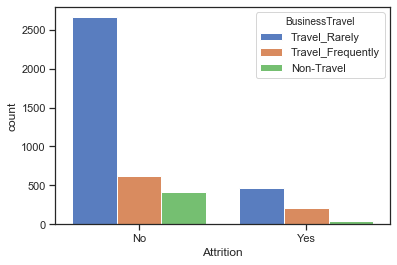

Department


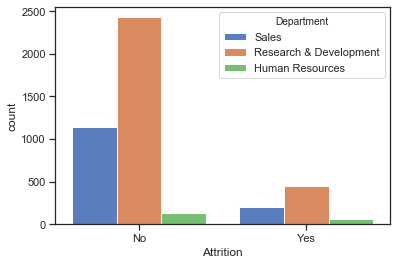

Education


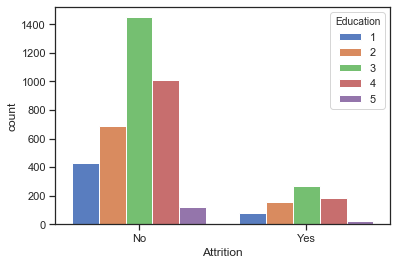

EducationField


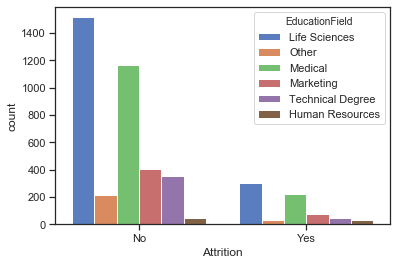

Gender


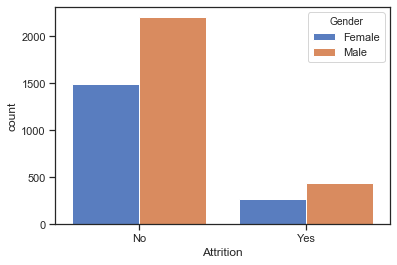

JobLevel


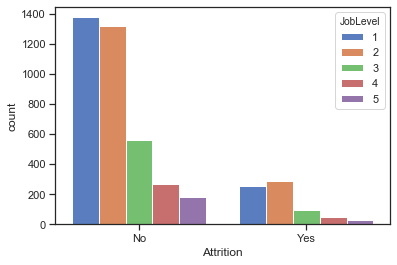

JobRole


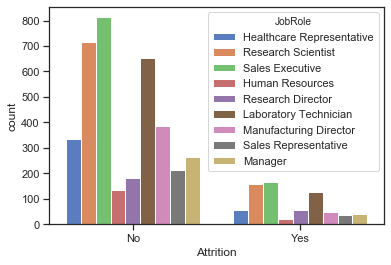

MaritalStatus


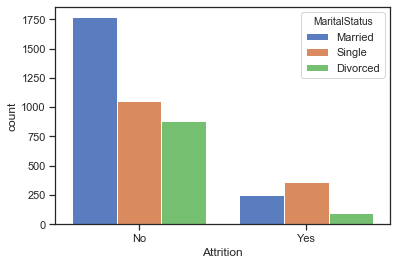

StockOptionLevel


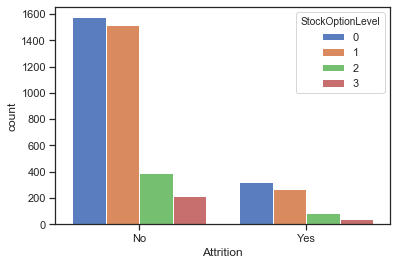

EnvironmentSatisfaction


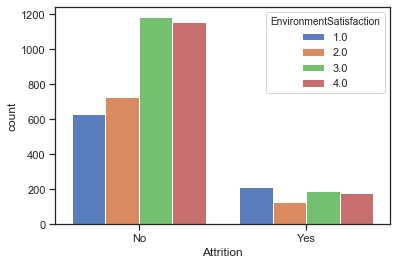

JobSatisfaction


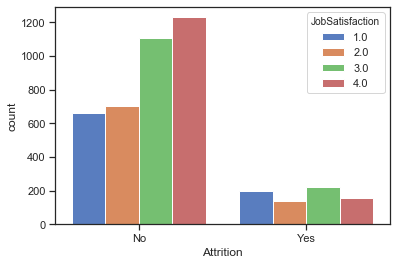

WorkLifeBalance


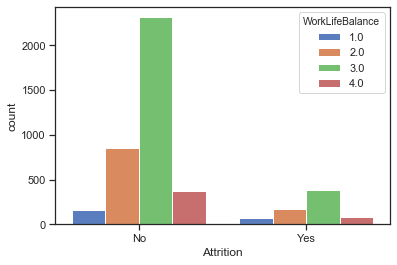

JobInvolvement


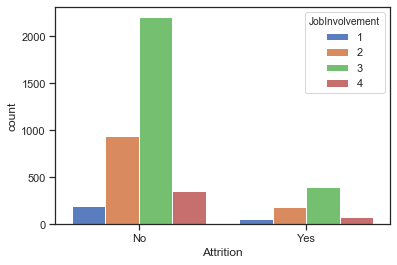

PerformanceRating


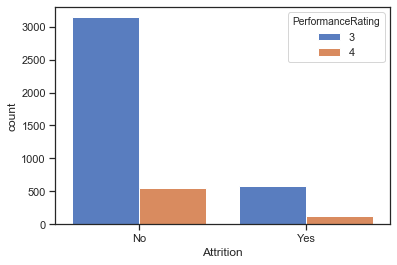

In [31]:
#data relationship with preddicteed varible in the formof histogram
for i in cat_variable:
    print(i)
    sns.countplot(x = 'Attrition',data=cat_variable,hue = i)
    plt.show()

In [32]:
dataset.corr()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.044314,0.299297,-0.033137,0.680340,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.021607,-0.012617,0.038125,0.009314,-0.009001,0.031684,0.002290,0.021584
MonthlyIncome,-0.044314,-0.021607,1.000000,-0.019915,0.004325,-0.033758,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299297,-0.012617,-0.019915,1.000000,0.031683,0.238774,-0.032123,-0.116322,-0.035421,-0.108223
PercentSalaryHike,-0.033137,0.038125,0.004325,0.031683,1.000000,-0.018810,-0.037392,-0.029707,-0.029542,-0.040864
TotalWorkingYears,0.680340,0.009314,-0.033758,0.238774,-0.018810,1.000000,-0.040843,0.626737,0.404015,0.458403
TrainingTimesLastYear,-0.027308,-0.009001,0.050112,-0.032123,-0.037392,-0.040843,1.000000,-0.007894,0.016121,-0.013270
YearsAtCompany,0.311309,0.031684,0.000995,-0.116322,-0.029707,0.626737,-0.007894,1.000000,0.618409,0.769212
YearsSinceLastPromotion,0.216513,0.002290,0.065219,-0.035421,-0.029542,0.404015,0.016121,0.618409,1.000000,0.510224
YearsWithCurrManager,0.202089,0.021584,0.024304,-0.108223,-0.040864,0.458403,-0.013270,0.769212,0.510224,1.000000


Above the highly corrlelated variables #Age = Totalworkingyears,YearsAtCompany,#total working year  = Years at company,years at promoton,current manager

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(data);

sns.countplot(x = "Attrition",data=data,hue="Age")
plt.show()

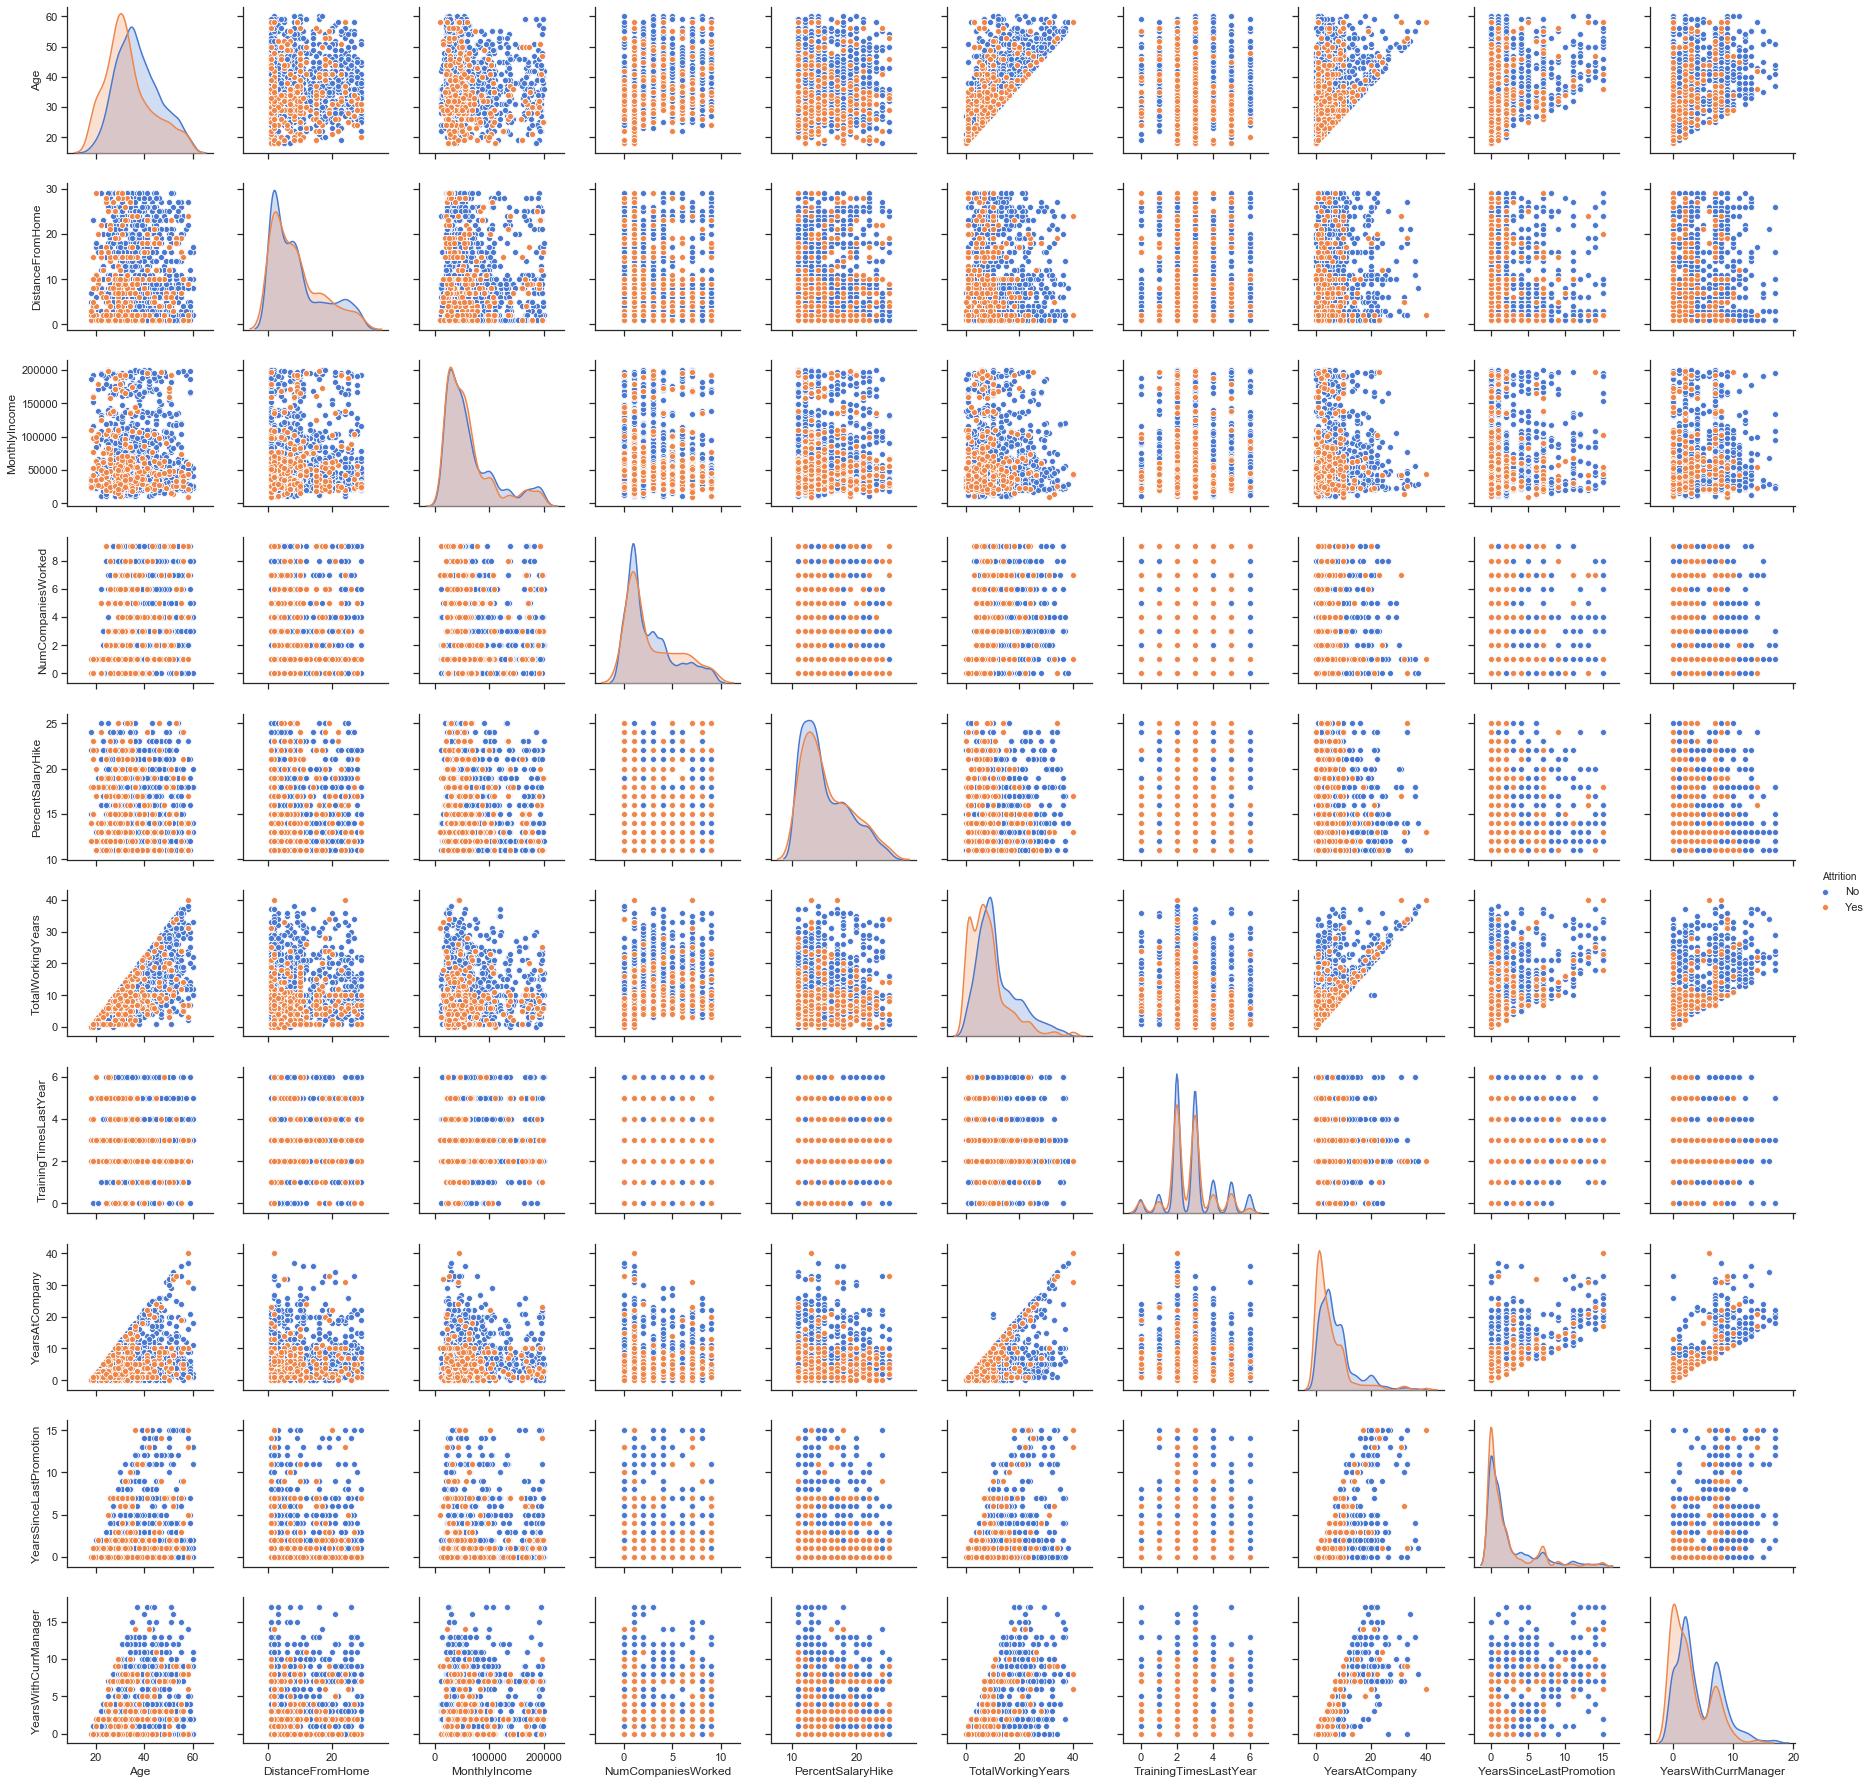

In [33]:
sns.pairplot(data = num_variable,hue= 'Attrition')

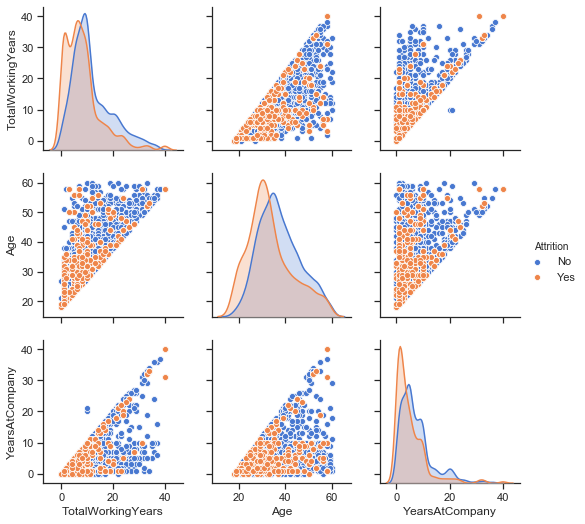

In [34]:
sns.pairplot(data = num_variable[['TotalWorkingYears','Age','YearsAtCompany','Attrition']],hue= 'Attrition')

above plot clearly shows that wwho have less ae less than35 are highlr attritionas well have a less working years.

## Checking dependent variable are balanced or imbalanced

In [35]:
dataset['Attrition'].value_counts()
#information shows our data is imbalanced so we can applying balanced techniques

No     3699
Yes     711
Name: Attrition, dtype: int64

# Preprocessing data
## LabelEncounter of categorigal data


In [36]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_cat = LabelEncoder()
dataset['BusinessTravel'] = LabelEncoder_cat.fit_transform(dataset['BusinessTravel'])
dataset['EducationField'] = LabelEncoder_cat.fit_transform(dataset['EducationField'])
dataset['Department']  = LabelEncoder_cat.fit_transform(dataset['Department'])
dataset['Gender'] = LabelEncoder_cat.fit_transform(dataset['Department'])
dataset['JobRole']  = LabelEncoder_cat.fit_transform(dataset['JobRole'])
dataset['MaritalStatus'] = LabelEncoder_cat.fit_transform(dataset['MaritalStatus'])
dataset['Attrition'] = LabelEncoder_cat.fit_transform(dataset['Attrition'])

### Checking Correlation

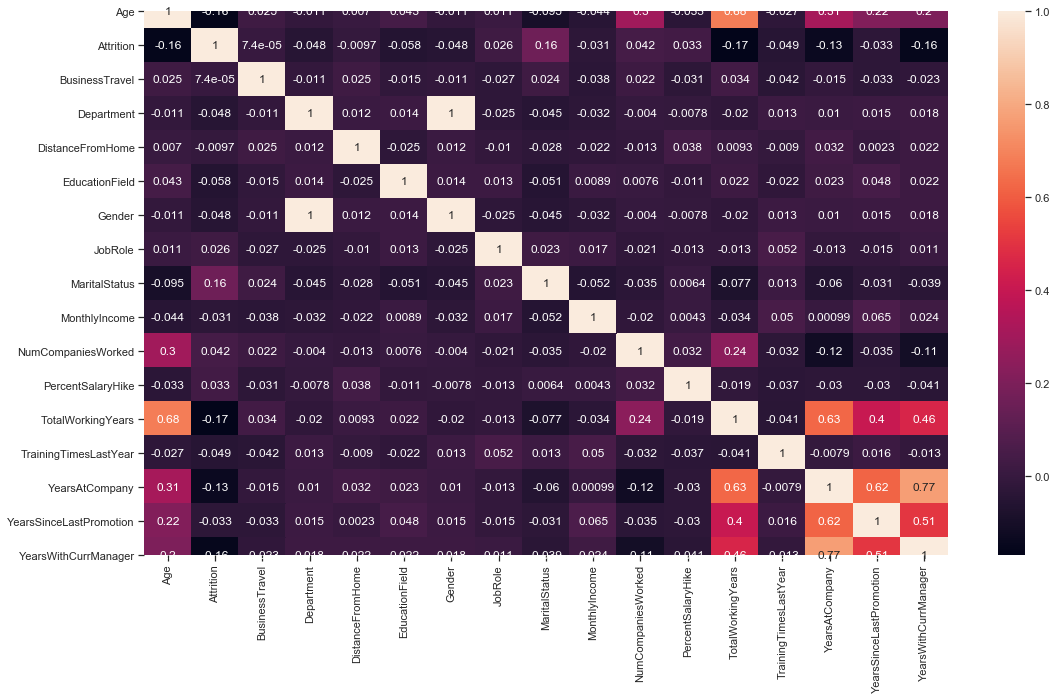

In [37]:
corr = dataset.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)
plt.show()

## Spliting Dataset

In [38]:
x = dataset.drop(['Attrition'],axis=1)
y = dataset['Attrition']

In [39]:
# spliting data intto train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

## Applying Logistic Regression Model

In [40]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [41]:
##Baseline Logistic model
logreg  = LogisticRegression(random_state=42)
logreg.fit(x_train,y_train)
#prediction
y_pred = logreg.predict(x_test)
print('Training Accuracy score : ',logreg.score(x_train,y_train))
print('Testing Accuracy Score : ',logreg.score(x_test,y_test))
print('Roc_auc Score : ',roc_auc_score(y_test,y_pred))
print('Recall Score : ',recall_score(y_test,y_pred))
print('Precision Score : ',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy score :  0.8370586329770003
Testing Accuracy Score :  0.8427815570672713
Roc_auc Score :  0.5
Recall Score :  0.0
Precision Score :  0.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1115
           1       0.00      0.00      0.00       208

    accuracy                           0.84      1323
   macro avg       0.42      0.50      0.46      1323
weighted avg       0.71      0.84      0.77      1323



In [42]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt = '.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.xlim(-0,len(np.unique(y))-0)
    plt.ylim(len(np.unique(y))-0,-0)
    plt.show()

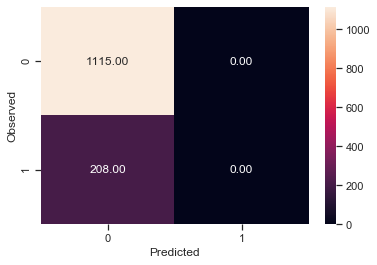

None


In [43]:
print(draw_cm(y_test,y_pred))

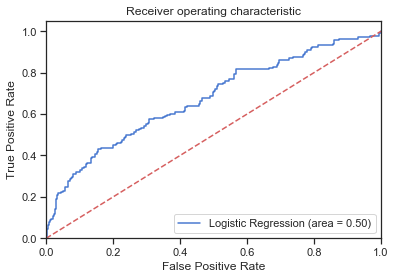

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


According to base model not satisfactory

## Tunning Hyperparameters

In [45]:
#using solver
train_score =[]
test_score = []
solver=['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2',C=0.75,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.852, 0.837, 0.837, 0.837, 0.837]

[0.85, 0.843, 0.843, 0.843, 0.843]


In [46]:
#using solver newton-cg
model = LogisticRegression(random_state=42,solver='newton-cg')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print('training accuracy:',model.score(x_train,y_train))
print()
print('testing accuracy:',model.score(x_test,y_test))
print()

training accuracy: 0.8516358924522189

testing accuracy: 0.8480725623582767



In [47]:
## using hyperparameter C
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.3,0.35,0.4,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.75, 1]

[0.85, 0.852, 0.852, 0.852, 0.852, 0.852, 0.852, 0.852, 0.852]

[0.849, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.848]


training accuracy: 0.8516358924522189

testing accuracy: 0.8503401360544217
Confusion Matrix


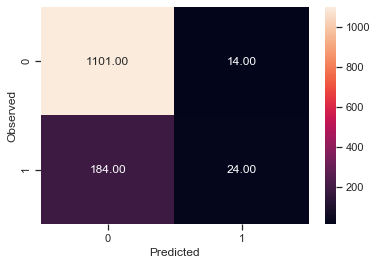

None

Recall : 0.11538461538461539

Precision: 0.631578947368421

f1 score: 0.19512195121951217

Roc auc score 0.5514142807864781


In [48]:
#using best solver newton-cg and penalty l2
model = LogisticRegression(random_state=42,solver='newton-cg',penalty='l2',C=0.30)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print('training accuracy:',model.score(x_train,y_train))
print()
print('testing accuracy:',model.score(x_test,y_test))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print('Recall :',recall_score(y_test,y_predict))
print()
print('Precision:',precision_score(y_test,y_predict))
print()
print('f1 score:',f1_score(y_test,y_predict))
print()
print('Roc auc score',roc_auc_score(y_test,y_predict))

## Using oversampling for balanced data


In [49]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Using TensorFlow backend.


In [50]:
ros = RandomOverSampler(random_state=42)
x_over,y_over = ros.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 30,random_state=42)
logreg  = LogisticRegression(solver = 'newton-cg',random_state=42,penalty='l2',C=0.30)
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
training_accuracy = logreg.score(x_train,y_train)
print('training score',training_accuracy)
testing_accuracy = logreg.score(x_test,y_test)
print('testing score',testing_accuracy)
print('roc_auc_score',roc_auc_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

training score 0.6881107491856677
testing score 0.8
roc_auc_score 0.7963800904977375
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.77      0.77      0.77        13

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



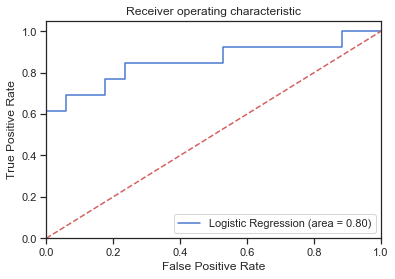

In [51]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()